## CIFAR10 Image Classification

In [1]:
#importing libraries 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# load cifar10 data
(train_X,train_Y),(test_X,test_Y)=datasets.cifar10.load_data()

In [4]:
train_X.shape,train_Y.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
test_X.shape,test_Y.shape

((10000, 32, 32, 3), (10000, 1))

In [6]:
train_X,train_Y

(array([[[[ 59,  62,  63],
          [ 43,  46,  45],
          [ 50,  48,  43],
          ...,
          [158, 132, 108],
          [152, 125, 102],
          [148, 124, 103]],
 
         [[ 16,  20,  20],
          [  0,   0,   0],
          [ 18,   8,   0],
          ...,
          [123,  88,  55],
          [119,  83,  50],
          [122,  87,  57]],
 
         [[ 25,  24,  21],
          [ 16,   7,   0],
          [ 49,  27,   8],
          ...,
          [118,  84,  50],
          [120,  84,  50],
          [109,  73,  42]],
 
         ...,
 
         [[208, 170,  96],
          [201, 153,  34],
          [198, 161,  26],
          ...,
          [160, 133,  70],
          [ 56,  31,   7],
          [ 53,  34,  20]],
 
         [[180, 139,  96],
          [173, 123,  42],
          [186, 144,  30],
          ...,
          [184, 148,  94],
          [ 97,  62,  34],
          [ 83,  53,  34]],
 
         [[177, 144, 116],
          [168, 129,  94],
          [179, 142,  87],
   

## visualize images

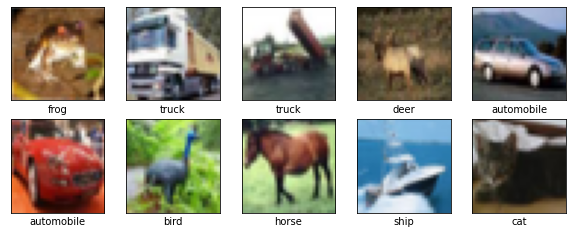

In [7]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i])
    
    plt.xlabel(class_names[train_Y[i][0]])
plt.show()   

In [8]:
# convert the pixel values of dataset float type 
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')

In [9]:
#normalize the dataset
train_X=train_X/255.0
test_X=test_X/255.0

In [11]:
#onehot encoding for target variables
from keras.utils import np_utils
train_Y
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)

In [12]:
train_Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
test_Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [14]:
train_Y.shape,test_Y.shape

((50000, 10), (10000, 10))

In [15]:
#number of classes in the dataset
total_classes=train_Y.shape[1]
total_classes

10

## CNN Model

In [17]:
#importing libraries
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D, Flatten, Dropout
from keras.optimizers import SGD,RMSprop,Adam

In [18]:
#CNN model
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(total_classes,activation="softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4

In [20]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
model.fit(train_X,train_Y,validation_data=(test_X,test_Y),epochs=10,batch_size=64)

Epoch 1/10
782/782 [==============================] - 173s 222ms/step - loss: 1.4917 - accuracy: 0.4654 - val_loss: 1.2242 - val_accuracy: 0.5742
Epoch 2/10
782/782 [==============================] - 175s 224ms/step - loss: 1.0811 - accuracy: 0.6171 - val_loss: 1.0247 - val_accuracy: 0.6433
Epoch 3/10
782/782 [==============================] - 177s 227ms/step - loss: 0.9135 - accuracy: 0.6795 - val_loss: 0.9397 - val_accuracy: 0.6708
Epoch 4/10
782/782 [==============================] - 183s 235ms/step - loss: 0.8019 - accuracy: 0.7170 - val_loss: 0.9101 - val_accuracy: 0.6824
Epoch 5/10
782/782 [==============================] - 184s 235ms/step - loss: 0.7045 - accuracy: 0.7516 - val_loss: 0.8692 - val_accuracy: 0.6995
Epoch 6/10
782/782 [==============================] - 175s 224ms/step - loss: 0.6162 - accuracy: 0.7794 - val_loss: 0.8800 - val_accuracy: 0.6939
Epoch 7/10
782/782 [==============================] - 171s 219ms/step - loss: 0.5426 - accuracy: 0.8077 - val_loss: 0.9171 -

In [21]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 5s 16ms/step - loss: 1.0131 - accuracy: 0.6913
69.12999749183655


In [121]:
classes_dictionary={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open(r"C:\Users\sivaluxan\Desktop\ML_Projects\Image_Classification\test_images\5-cat.jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))

im=np.expand_dims(im,axis=0)
im=np.array(im)
#print(im)
pred=model.predict_classes([im])[0]
print(pred,classes_dictionary[pred])

0 aeroplane
